# Walmart Sales prediction 

econ 323
kangcheng wang

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import sklearn
import sklearn.model_selection
import sklearn.ensemble
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import time
%matplotlib inline

the goal of this project is to analyze and predict walmart sales

data sourse: kaggle author:Divyajeet Thakur
link:https://www.kaggle.com/divyajeetthakur/walmart-sales-prediction

## import data set

the dataset comes from kaggle

In [11]:
featuresurl = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT4Aym1qyqndlkEIGmcgDXs9Z7qQL0QDWi28_oX36gO-4xwEr1xmJJaZfbBJHNcxjwTBZd6qX_5gGxY/pub?gid=992397029&single=true&output=csv"
features = pd.read_csv(featuresurl)
features.info()
features.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [12]:
storeurl = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ09YrFUmfVgcD67ljj9T2JTUup0ZioCUgVQSfNCJdK-BKi4KIWou8H_zM1tkxIzJO_CrZYi43WoAoJ/pub?gid=1097439051&single=true&output=csv"
store = pd.read_csv(storeurl)
store.info()
store.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [13]:
data1=pd.merge(features,store, on="Store")
data1.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [14]:
trainurl = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTFBgujXMujjCrchhSxWjVXnDe7QEUGIr8SODNT2JOjj8FEDKcNXcCyDAz13EAwgEETvyKegLZxdhML/pub?gid=404985053&single=true&output=csv"
train = pd.read_csv(trainurl)
train.info()

train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


## merge data set

In [15]:
alldata=pd.merge(train,data1, on=["Store", "Date","IsHoliday"])
alldata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


### fill na with 0

In [16]:
#fill the na

alldata[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = alldata[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
alldata.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


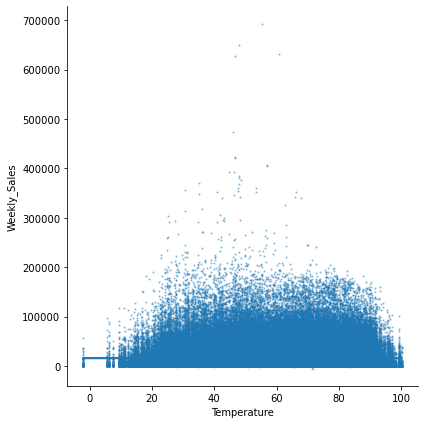

In [17]:
def scatterplot(x):
    sns.lmplot(
        data=alldata, x=x, y="Weekly_Sales", height=6,
        scatter_kws=dict(s=1.5, alpha=0.35)
        )
scatterplot("Temperature")

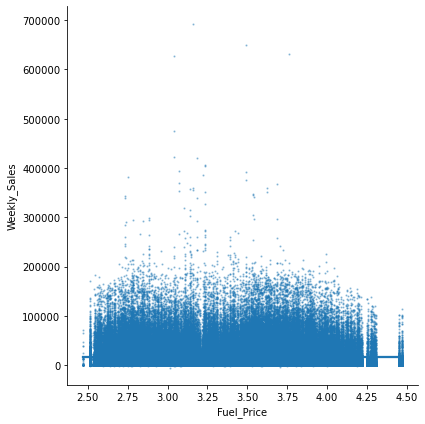

In [18]:
scatterplot("Fuel_Price")

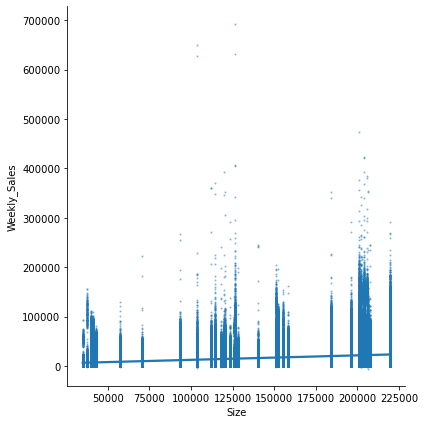

In [19]:
scatterplot("Size")

<AxesSubplot:xlabel='Type'>

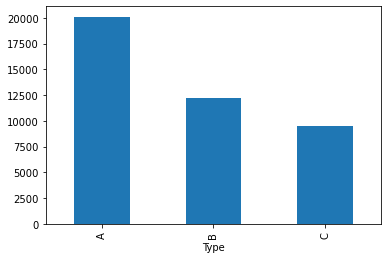

In [20]:
alldata.groupby(["Type"])["Weekly_Sales"].mean().plot.bar()

<AxesSubplot:xlabel='Type'>

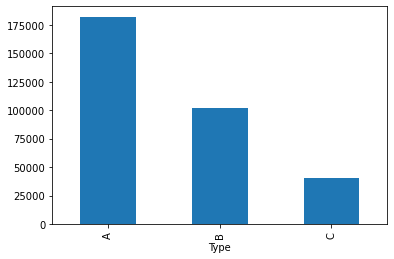

In [21]:
alldata.groupby(["Type"])["Size"].mean().plot.bar()

<AxesSubplot:xlabel='Store'>

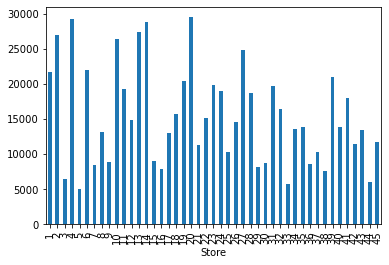

In [22]:
alldata.groupby(["Store"])["Weekly_Sales"].mean().plot.bar()

### type A store has larger size and weekly sales
### so we only need one of type or size as control variable"

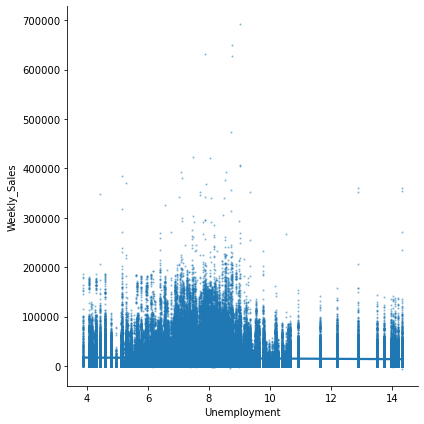

In [23]:
scatterplot("Unemployment")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


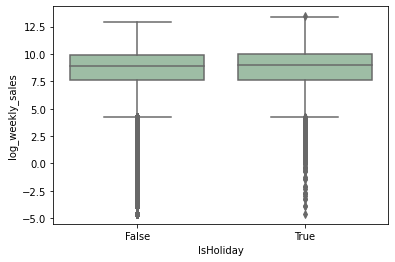

In [24]:
alldata["log_weekly_sales"]=np.log(alldata["Weekly_Sales"])
fig, ax = plt.subplots()
ax = sns.boxplot(x='IsHoliday', y='log_weekly_sales', data=alldata, color='#99c2a2')
plt.show()

### Holiday
holiday does not affect the weekly sale alot

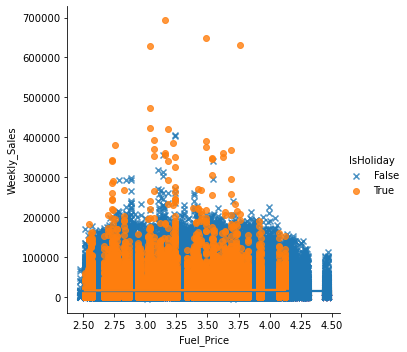

In [25]:
sns.lmplot(data=alldata,x="Fuel_Price",y="Weekly_Sales",hue="IsHoliday",markers=["x","o"])

## month
because people more likely to shopping before Christmas, the sales are different in different month.
add dummy variable month

In [26]:
alldata["Date"]= pd.to_datetime(alldata["Date"])


alldata["week"]= alldata.Date.dt.isocalendar().week
alldata["year"]= alldata.Date.dt.year
alldata['Month'] = alldata.Date.dt.month

<AxesSubplot:xlabel='Month'>

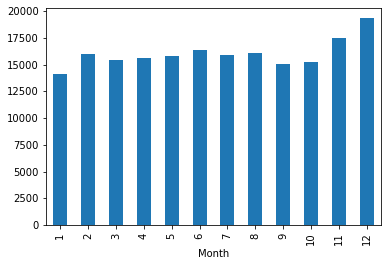

In [27]:
alldata.groupby(["Month"])["Weekly_Sales"].mean().plot.bar()


November and December has larger average Weekly sale, so we add month as control varriable.


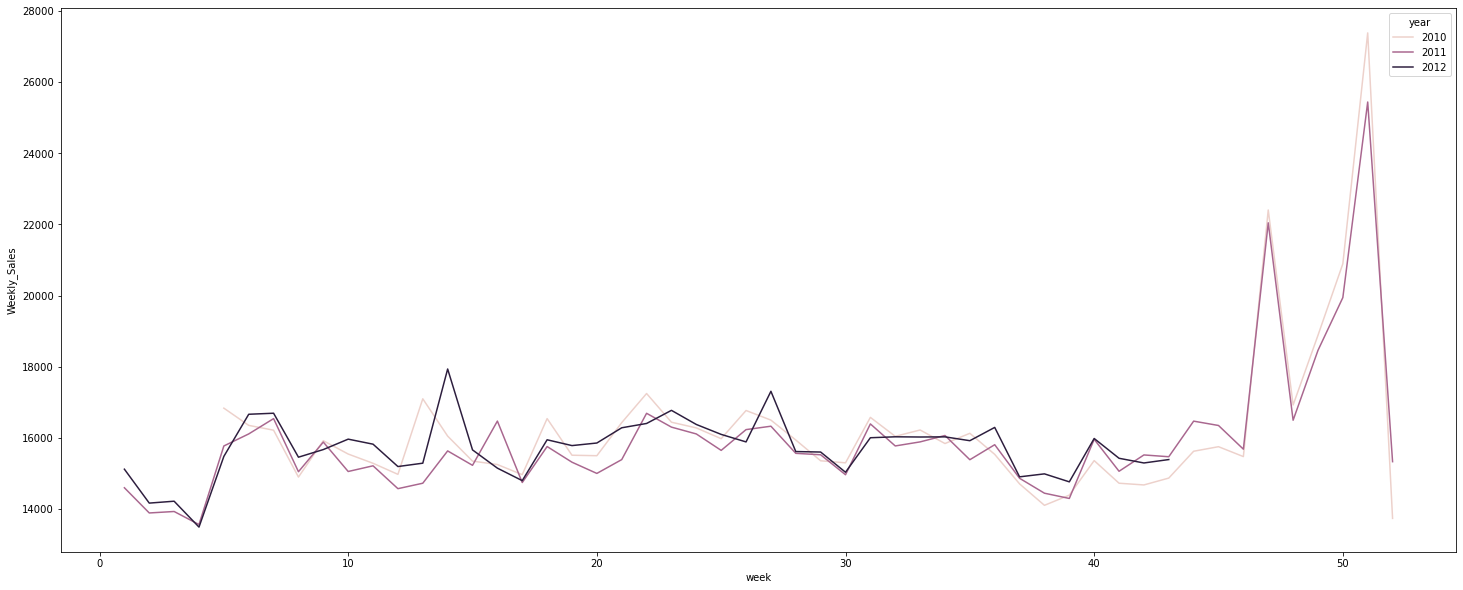

In [28]:
fig, ax = plt.subplots()

fig.set_size_inches(25, 10)

sns.lineplot(x= "week", y= "Weekly_Sales", data= alldata,hue= "year",ci= None)

plt.show()

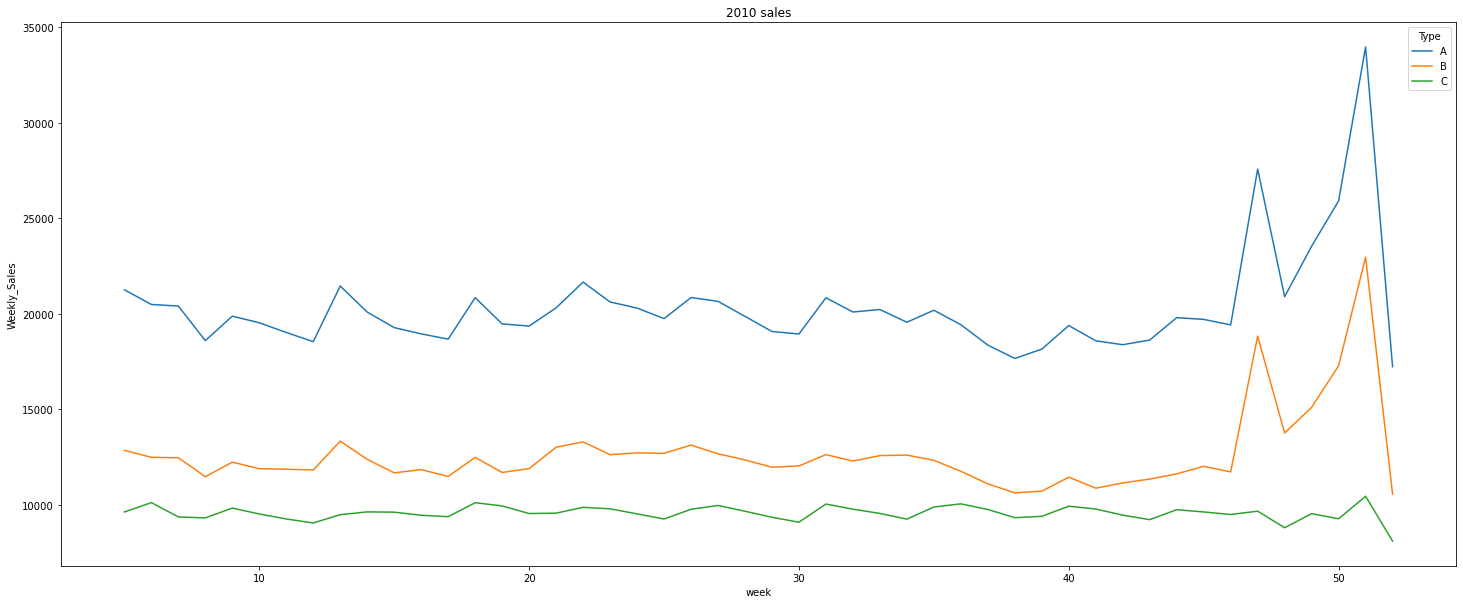

In [29]:
fig, ax = plt.subplots()

fig.set_size_inches(25, 10)

sns.lineplot(x= "week", y= "Weekly_Sales", data= alldata[alldata["year"]==2010],hue= "Type",ci= None)
plt.title("2010 sales")

plt.show()

type c store sales not affect a lot by  Christmas month

C:\Users\84660\AppData\Local\Temp/ipykernel_4996/951166118.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

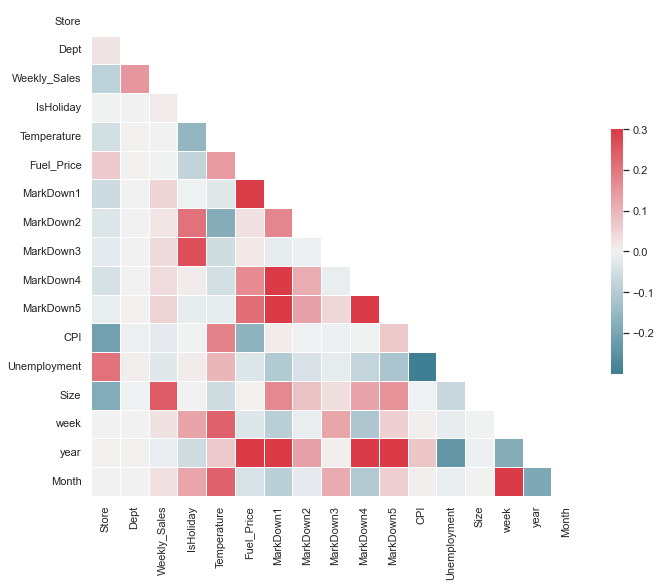

In [30]:
sns.set(style="white")
alldata1=alldata.drop(columns=["log_weekly_sales"])
corr = alldata1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

weekly sales largely related with size

### split data set and slect variable
80% for train
20% for test

In [31]:
alldata["week"]=alldata["week"].astype(float)
train=alldata.sample(frac=0.8,random_state=123) 
test=alldata.drop(train.index)

#slect variable

y, X = patsy.dmatrices("Weekly_Sales ~ Temperature + Fuel_Price + CPI+Unemployment+C(IsHoliday)+C(week)+C(Store)+C(Type)+MarkDown1+MarkDown2+MarkDown3+MarkDown4+MarkDown5"
                        , alldata, return_type='matrix')

y = y.flatten()



y_train = y[train.index]
X_train = X[train.index]
y_test = y[test.index]
X_test = X[test.index]

# Random forest model

In [32]:
from sklearn import linear_model
from sklearn import (linear_model, metrics, neural_network, pipeline, model_selection)


param_grid = { 'max_depth': [ 4,8, None] } 
rf_grid = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestRegressor(n_estimators=25), 
                                               param_grid, cv=4, scoring='neg_mean_squared_error')


rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_ 





mse_train = metrics.mean_squared_error(y_train, rf_best.predict(X_train))
print("train mse:",mse_train)

mse_test = metrics.mean_squared_error(y_test, rf_best.predict(X_test))
print("test mse:",mse_test)

train mse: 474631500.36787087
test mse: 458005312.11130714


test mse is smaller than train mse, the model works

<AxesSubplot:xlabel='Size', ylabel='Weekly Sales'>

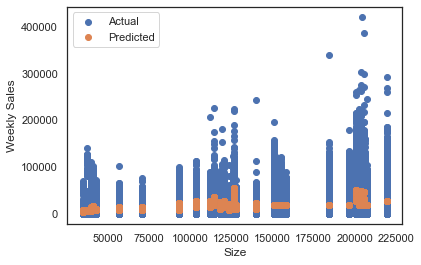

In [33]:
# scatter vs one variable
def predictionscatter(model, X, y, data, variable, ax=None):
  yhat = model.predict(X)
  if ax is None:
    _, ax = plt.subplots()
  ax.scatter(data[variable], y, label="Actual")
  ax.scatter(data[variable], yhat, label="Predicted")
  ax.set_xlabel(variable)
  ax.set_ylabel("Weekly Sales")
  ax.legend()
  return ax

predictionscatter(rf_best, X_test, y_test, test, "Size")

# could also do residual vs one variable

<AxesSubplot:xlabel='Month', ylabel='Weekly Sales'>

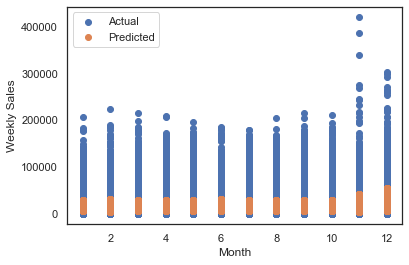

In [34]:
predictionscatter(rf_best, X_test, y_test, test, "Month")

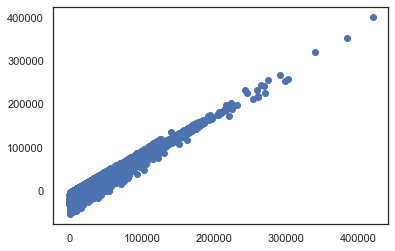

In [35]:
# residuals vs actual
plt.scatter(y_test, y_test - rf_best.predict(X_test))

the prediction looks good

Text(0.5, 1.0, 'Average Change in Predicted Sales for a 1\\% increase in Size')

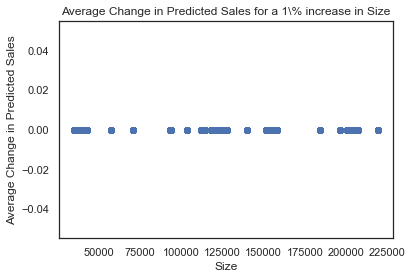

In [36]:
# Average change in predicted sales for an given change in a variable
formula = "Weekly_Sales ~ Temperature + Fuel_Price + CPI+Unemployment+C(IsHoliday)+C(week)+C(Store)+C(Type)+MarkDown1+MarkDown2+MarkDown3+MarkDown4+MarkDown5"
def averagechange(model, data, variable, change=1):
  _, X0 = patsy.dmatrices(formula, data, return_type='matrix')
  yhat0 = model.predict(X0)
  data = data.copy()
  data[variable] = data[variable] + change
  _, X = patsy.dmatrices(formula, data, return_type='matrix')
  yhat = model.predict(X)
  yhat_change = yhat - yhat0
  return yhat_change

def plotaveragechange(model, data, variable, change=1, ax=None):
  yhat_change = averagechange(model, data, variable, change)
  if ax is None:
    fig, ax = plt.subplots()
  ax.scatter(data[variable], yhat_change)
  ax.set_xlabel(variable)
  ax.set_ylabel("Average Change in Predicted Sales")
  return ax

ax = plotaveragechange(rf_best, test, "Size", change=test["Size"].mean()/100)
ax.set_title("Average Change in Predicted Sales for a 1\% increase in Size")

In [37]:
y_prediction = rf_best.predict(X_test)
testfile = pd.concat([test.reset_index(drop=True) , pd.DataFrame(y_prediction,columns=["predict_weeklysale"])], axis=1)


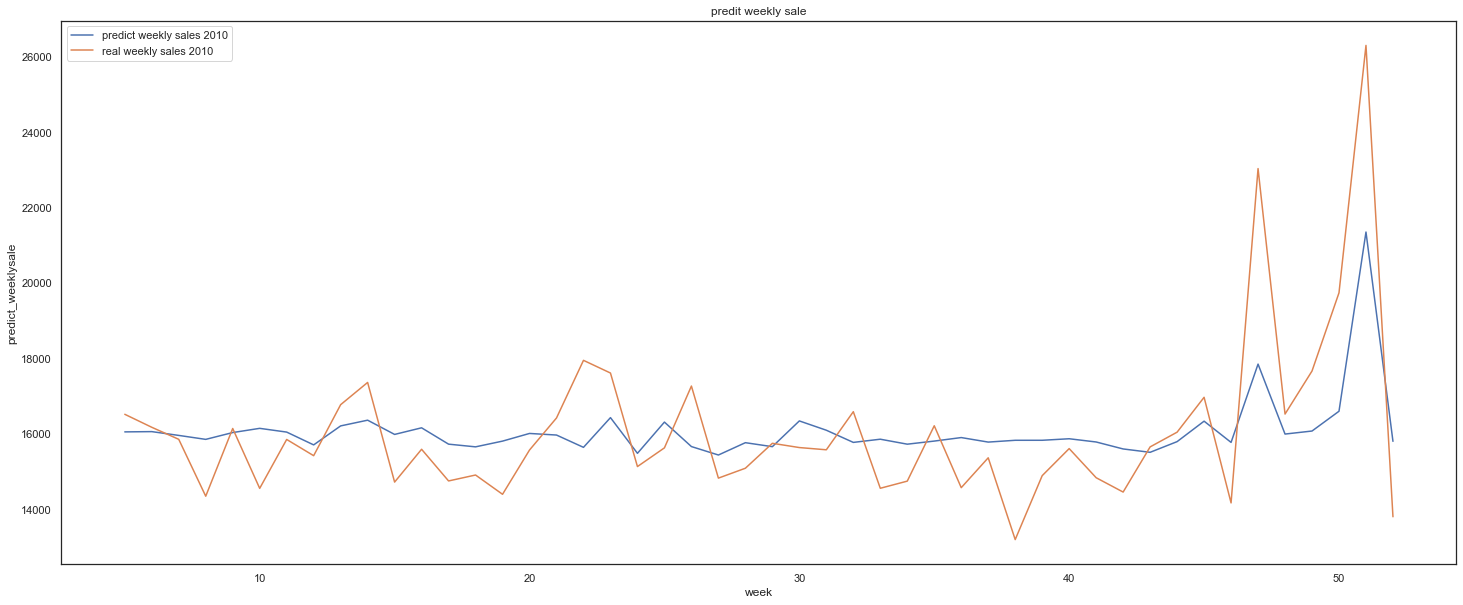

In [38]:
fig, ax = plt.subplots()

fig.set_size_inches(25, 10)

sns.lineplot(x= "week", 
                 y= "predict_weeklysale", 
                 data= testfile[testfile["year"]==2010], 
                 ci= None,label="predict weekly sales 2010")

sns.lineplot(x= "week", 
                 y= "Weekly_Sales", 
                 data= testfile[testfile["year"]==2010],
                 ci= None,label= "real weekly sales 2010")


plt.title("predit weekly sale")
plt.show()

prediction weekly sales has same trend with the real weekly sales

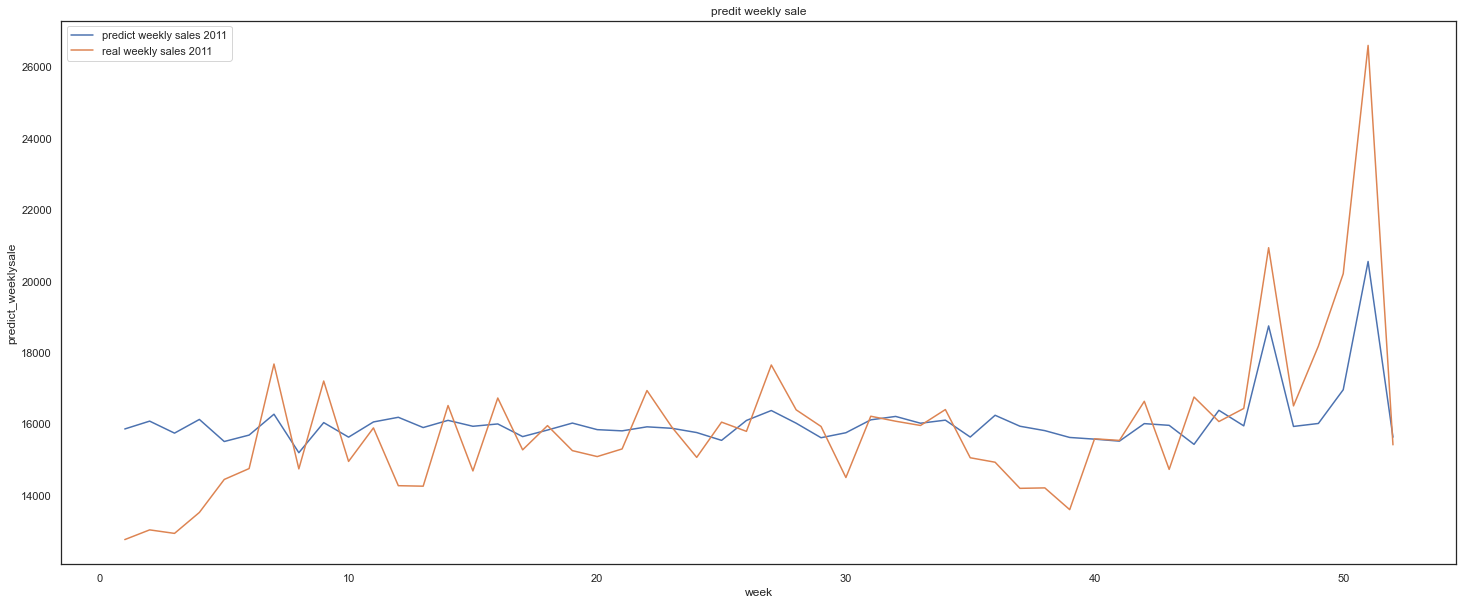

In [39]:
fig, ax = plt.subplots()

fig.set_size_inches(25, 10)

sns.lineplot(x= "week", 
                 y= "predict_weeklysale", 
                 data= testfile[testfile["year"]==2011], 
                 ci= None,label="predict weekly sales 2011")

sns.lineplot(x= "week", 
                 y= "Weekly_Sales", 
                 data= testfile[testfile["year"]==2011],
                 ci= None,label= "real weekly sales 2011")


plt.title("predit weekly sale")
plt.show()

# netural network model

In [40]:
from sklearn import preprocessing, pipeline
from sklearn import neural_network


#param_grid1 = {"hidden_layer_sizes": [(20,30)], "activation": ["logistic", "tanh", "relu"],
                 #"solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]} 


#nn_grid = pipeline.make_pipeline(preprocessing.StandardScaler(),sklearn.model_selection.GridSearchCV(neural_network.MLPRegressor(solver='adam', max_iter=200, 
                           #learning_rate_init=0.001),param_grid1, cv=4, scoring='neg_mean_squared_error'))





nn_scaled_model = pipeline.make_pipeline(preprocessing.StandardScaler(), neural_network.MLPRegressor((30, 20)))




nn_scaled_model.fit(X_train, y_train)



mse_train = metrics.mean_squared_error(y_train,nn_scaled_model.predict(X_train))
mse_test = metrics.mean_squared_error(y_test,nn_scaled_model.predict(X_test))
 

print("train mse:",mse_train)
print("test mse:",mse_test)
     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


train mse: 465933133.06123585
test mse: 452120411.5271184


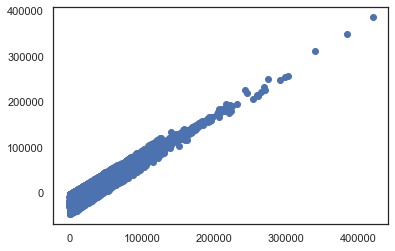

In [41]:
# residuals vs actual
plt.scatter(y_test, y_test - nn_scaled_model.predict(X_test))

<AxesSubplot:xlabel='Size', ylabel='Weekly Sales'>

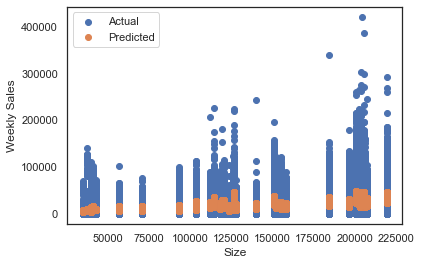

In [51]:
predictionscatter(nn_scaled_model, X_test, y_test, test, "Size")

Text(0.5, 1.0, 'Average Change in Predicted Sales for a 1\\% increase in Size')

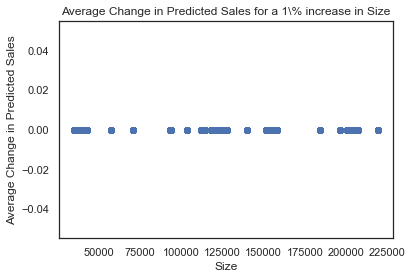

In [52]:
ax = plotaveragechange(nn_scaled_model, test, "Size", change=test["Size"].mean()/100)
ax.set_title("Average Change in Predicted Sales for a 1\% increase in Size")

In [45]:
y_prediction1 = nn_scaled_model.predict(X_test)
testfile1 = pd.concat([test.reset_index(drop=True) , pd.DataFrame(y_prediction1,columns=["predict_weeklysale"])], axis=1)


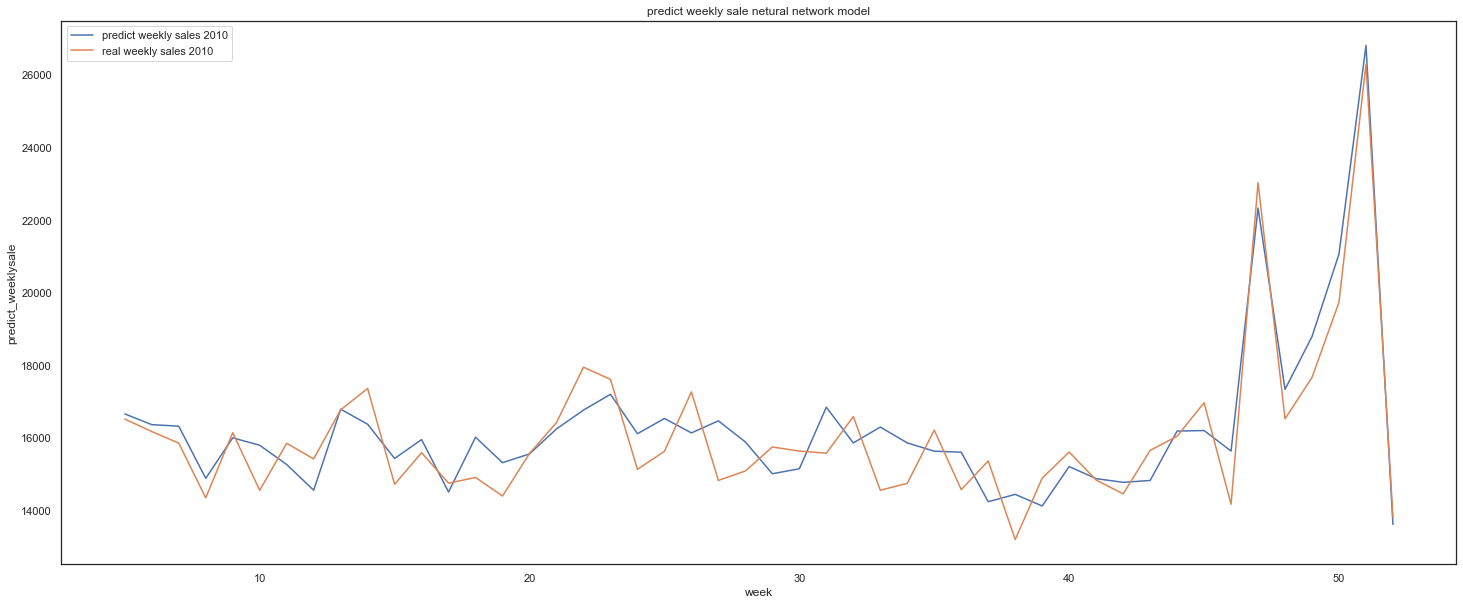

In [55]:
fig, ax = plt.subplots()

fig.set_size_inches(25, 10)

sns.lineplot(x= "week", 
                 y= "predict_weeklysale", 
                 data= testfile1[testfile1["year"]==2010], 
                 ci= None,label="predict weekly sales 2010")

sns.lineplot(x= "week", 
                 y= "Weekly_Sales", 
                 data= testfile1[testfile1["year"]==2010],
                 ci= None,label= "real weekly sales 2010")


plt.title("predict weekly sale netural network model")
plt.show()

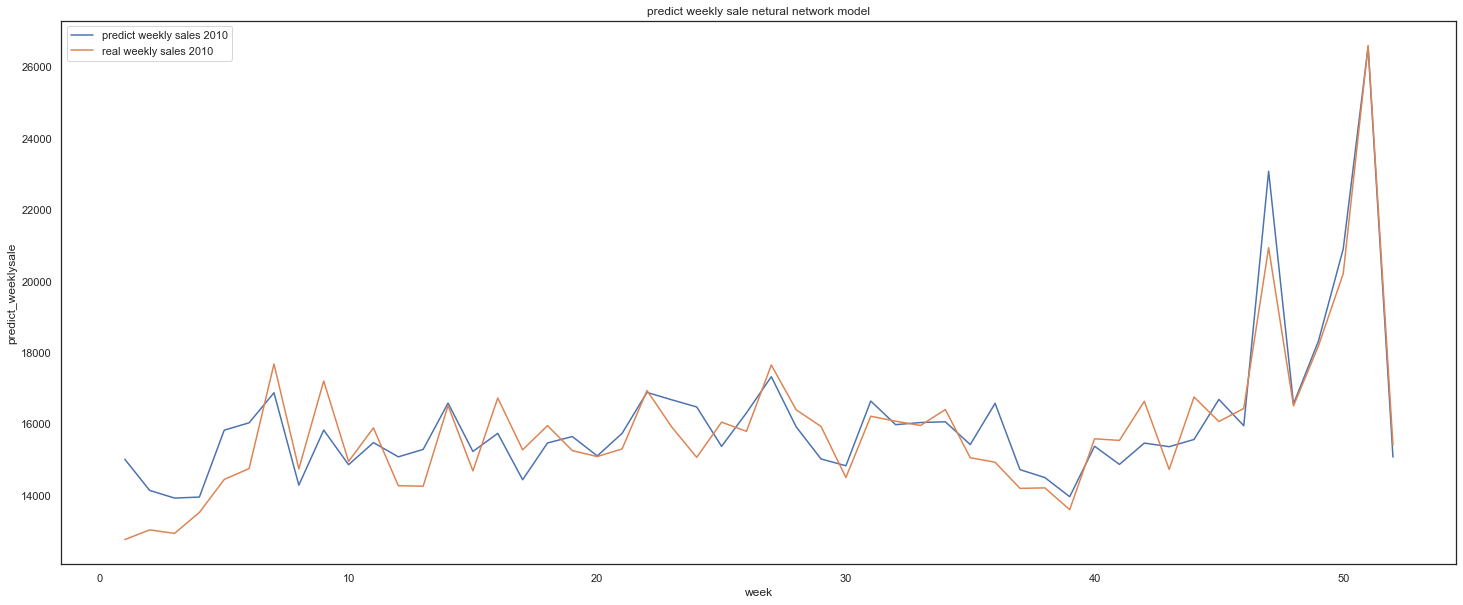

In [53]:
fig, ax = plt.subplots()

fig.set_size_inches(25, 10)

sns.lineplot(x= "week", 
                 y= "predict_weeklysale", 
                 data= testfile1[testfile1["year"]==2011], 
                 ci= None,label="predict weekly sales 2010")

sns.lineplot(x= "week", 
                 y= "Weekly_Sales", 
                 data= testfile1[testfile1["year"]==2011],
                 ci= None,label= "real weekly sales 2010")


plt.title("predict weekly sale netural network model")
plt.show()

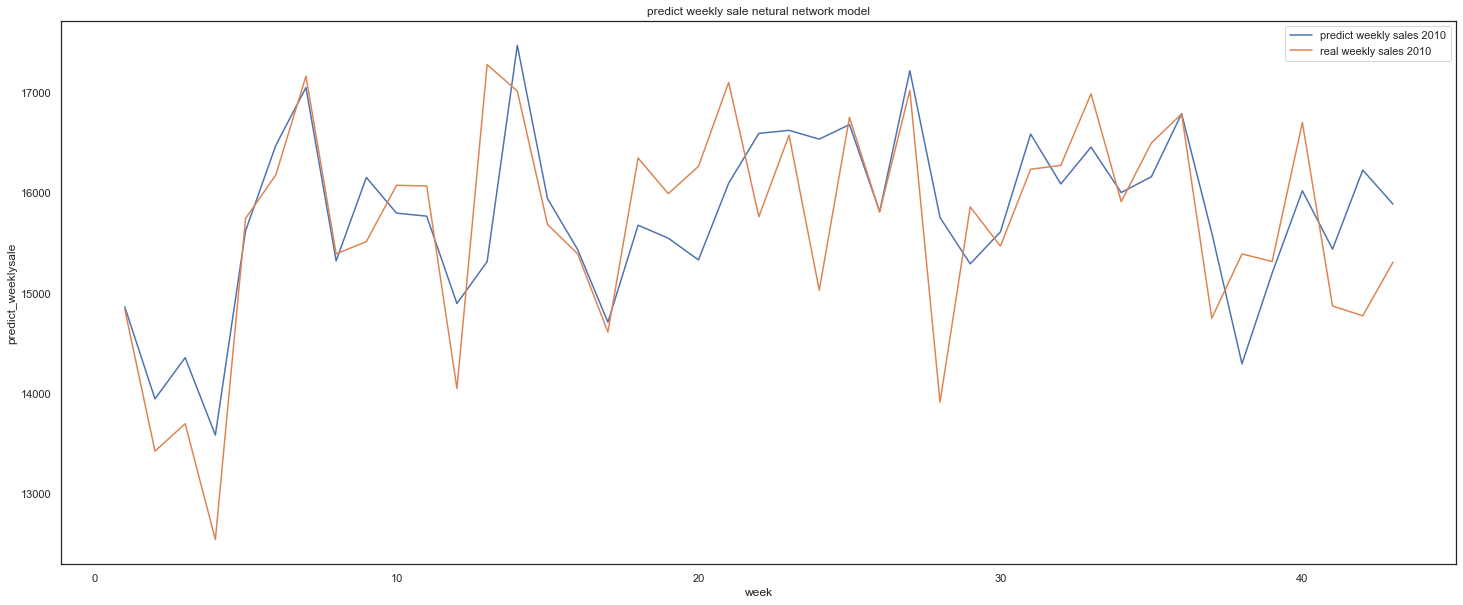

In [54]:
fig, ax = plt.subplots()

fig.set_size_inches(25, 10)

sns.lineplot(x= "week", 
                 y= "predict_weeklysale", 
                 data= testfile1[testfile1["year"]==2012], 
                 ci= None,label="predict weekly sales 2010")

sns.lineplot(x= "week", 
                 y= "Weekly_Sales", 
                 data= testfile1[testfile1["year"]==2012],
                 ci= None,label= "real weekly sales 2010")


plt.title("predict weekly sale netural network model")
plt.show()

the graph looks better for netural model
the netural net work model predict the weekly sales more accurate